<a href="https://colab.research.google.com/github/notjaswanth69/lda1/blob/main/lda1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

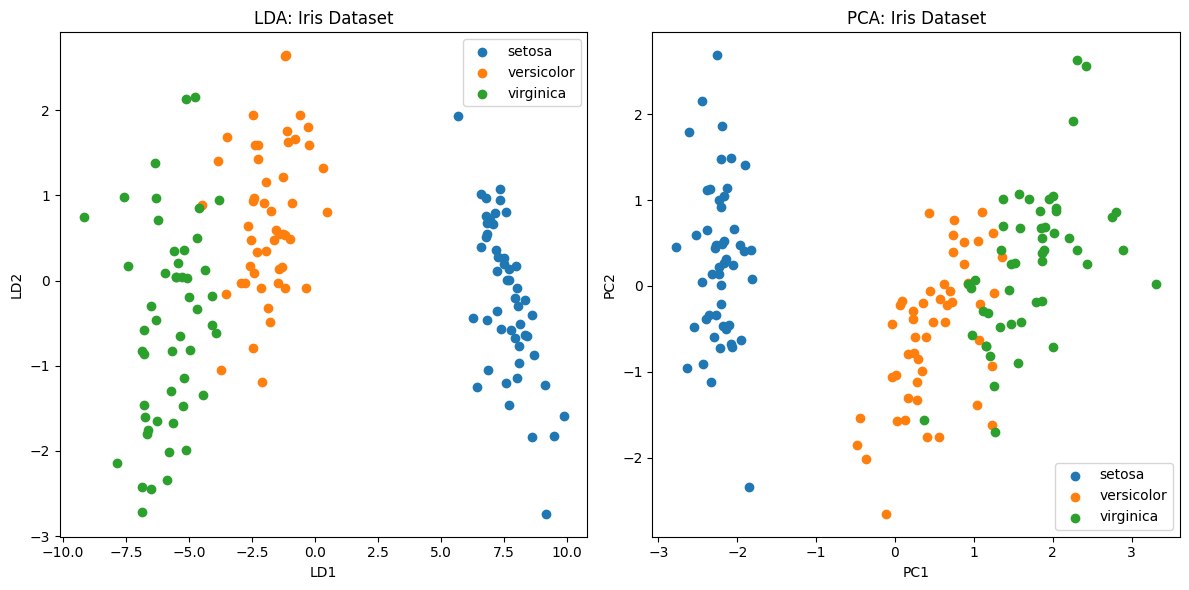

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris_df = pd.read_csv('/content/iris.csv')

# Separate features and target variable
features = iris_df.iloc[:, :-1].values  # All columns except the last one
target = iris_df.iloc[:, -1].values      # Last column as target

# Encode the target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Standardize the features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Apply Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis(n_components=2)
features_lda = lda_model.fit_transform(features_std, target_encoded)

# Apply Principal Component Analysis (PCA)
pca_model = PCA(n_components=2)
features_pca = pca_model.fit_transform(features_std)

# Create subplots for LDA and PCA visualizations
plt.figure(figsize=(12, 6))

# LDA Plot
plt.subplot(1, 2, 1)
for i, class_name in zip(range(len(label_encoder.classes_)), label_encoder.classes_):
    plt.scatter(features_lda[target_encoded == i, 0], features_lda[target_encoded == i, 1], label=class_name)
plt.title('LDA: Iris Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()

# PCA Plot
plt.subplot(1, 2, 2)
for i, class_name in zip(range(len(label_encoder.classes_)), label_encoder.classes_):
    plt.scatter(features_pca[target_encoded == i, 0], features_pca[target_encoded == i, 1], label=class_name)
plt.title('PCA: Iris Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()